## Process to lip reading

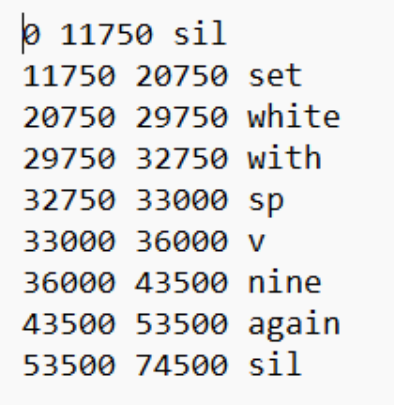

In [3]:
import json
import pandas as pd
import numpy as np
import cv2
import glob
import os

from pythainlp import word_tokenize

In [9]:
for num_data in range(1,5):
  folder = f"full-data/Collect_{num_data}/script"
  for path in glob.glob(f"{folder}/*"):
    if not os.path.exists(f"{path}/word-level"):
      os.mkdir(f"{path}/word-level")
    for jsonfile in glob.glob(f"{path}/whisper/*"):
      filename = os.path.basename(jsonfile)[:-5]
      f = open(jsonfile, encoding='utf8')
      data = json.load(f)
      texts = list()
      for script in data:
        text = script["text"]
        syllables = script["words"]
        starts = list()
        ends = list()
        words = list()
        word = str()

        texts.append(text)

        word_list = word_tokenize(text, engine="deepcut")
        # word_list = word_tokenize(text)
        for syl in syllables:
          if word == "":
            try:
              starts.append(syl["start"])
            except:
              pass
          word += syl["word"]
          if word in word_list:
            words.append(word)
            try:
              ends.append(syl["end"])
            except:
              pass
            word = ""

      scripts = [dict(word=word, start=starts * 44100, end=ends * 44100) for word, starts, ends in zip(words, starts, ends)]
      try:
        result = {"text": texts,
                  "word": scripts}
        
        cap = cv2.VideoCapture(f'{path}/video/{filename}.mp4')
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        video_duration = 200 / fps * 44100
        if len(result["word"]) != 0:
          first_sil = {'word': 'sil', 'start': 0.0, 'end': 0.0}
          last_end = result['word'][-1]['end']
          last_sil = {'word': 'sil', 'start': last_end, 'end': video_duration}

          result['word'].insert(0, first_sil)
          result['word'].append(last_sil)
          content = ''
          for k in result['word']:
            content = f"{content} {str(int(k['start']))} {str(int(k['end']))} {k['word']} \n"
            destination = f'{path}/word-level/{filename}.align'
            with open(destination, "w") as file:
              file.write(content)

          # with open(f"{path}/word-level/{filename}.json", "w", encoding='utf-8') as outfile:
          #   json.dump(result, outfile, ensure_ascii=False)
      except:
          print(filename)

1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


In [10]:
jsonfile

'full-data/Collect_1/script/video-21346/whisper/99-เพราะฉะนั้นนี่ โดยทั่วไป เราจะบอกว่า.json'

In [1]:
import shutil
import glob

for num in range(1,11):

    folder_path = f"/home/somkiat/Lip_reading/whisper/Collect_{num}/script/*"  # Replace with the path to the folder you want to delete
    for video in glob.glob(folder_path):
        folder = f"{video}/word-level"
        try:
            shutil.rmtree(folder)  # Removes the directory and its contents
            print(f"Folder '{folder_path}' and its contents have been deleted.")
        except OSError as e:
            print(f"Error: {e}")

Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkiat/Lip_reading/whisper/Collect_1/script/*' and its contents have been deleted.
Folder '/home/somkia